<a href="https://colab.research.google.com/github/pifeldma/MAT-422/blob/main/hw4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.2 Spectral graph bipartitioning

[0.05300611480757429, 0.05667039590382262]


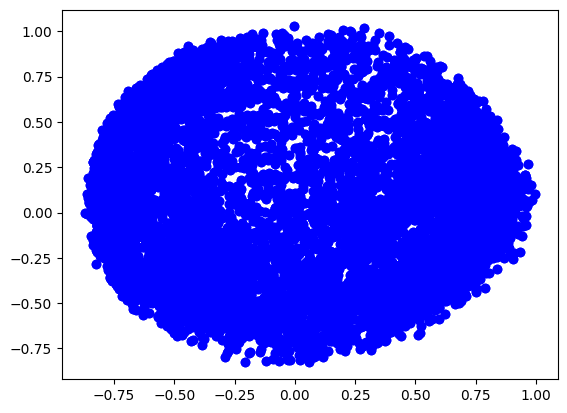

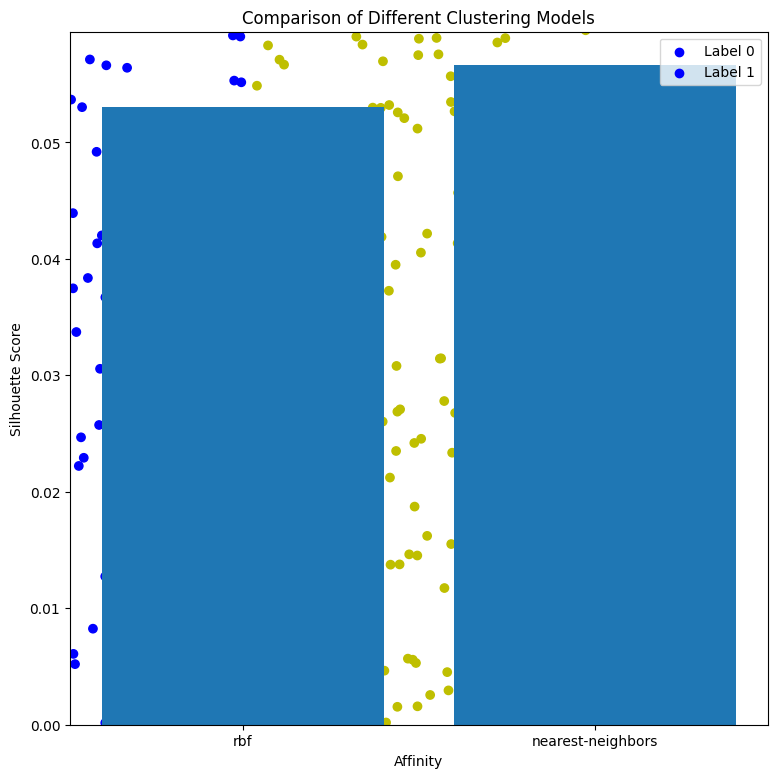

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn. cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

X = pd.read_csv('CC GENERAL.csv')
X = X.drop('CUST_ID', axis = 1)
X.fillna(method = 'ffill', inplace = True)
X.head()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()

spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity = 'rbf')
labels_rbf = spectral_model_rbf.fit_predict(X_principal)
colours = {}
colours[0] = 'b'
colours[1] = 'y'
cvec = [colours[label] for label in labels_rbf]
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color='b');

plt.figure(figsize = (9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b,y), ('Label 0', 'Label 1'))
plt.show

spectral_model_nn = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors')
labels_nn = spectral_model_nn.fit_predict(X_principal)

affinity = ['rbf', 'nearest-neighbors']
s_scores = []
s_scores.append(silhouette_score(X, labels_rbf))
s_scores.append(silhouette_score(X, labels_nn))
print(s_scores)

plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Different Clustering Models')
plt.show()